In [54]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [56]:
dataset = pd.read_csv('em-9EhjTEemU7w7-EFnPcg_7aa34fc018d311e980c2cb6467517117_happyscore_income.csv')

In [58]:
dataset.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [60]:
dataset.shape

(111, 11)

In [62]:
dataset.isna().sum()

country                  0
adjusted_satisfaction    0
avg_satisfaction         0
std_satisfaction         0
avg_income               0
median_income            0
income_inequality        0
region                   0
happyScore               0
GDP                      0
country.1                0
dtype: int64

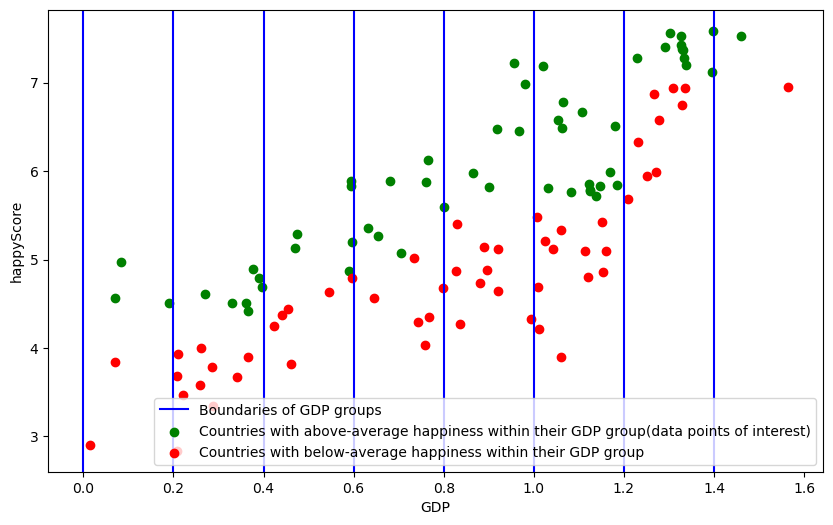

In [100]:
groups = [i/10 for i in range(0,18,2)]
plt.figure(figsize=(10, 6))
for i in groups[:-1]:
    condition = (dataset['GDP']>i)&(dataset['GDP']<i+0.2)
    plt.axvline(i,color='blue',label='Boundaries of GDP groups')
    actual_GDP, actual_happy = dataset[condition]['GDP'], dataset[condition]['happyScore']
    mean_happy_in_group = np.mean(actual_happy)
    plt.scatter(actual_GDP[actual_happy>mean_happy_in_group],
                actual_happy[actual_happy>mean_happy_in_group],color='green',label='Countries with above-average happiness within their GDP group(data points of interest)')
    plt.scatter(actual_GDP[actual_happy<mean_happy_in_group],
                actual_happy[actual_happy<mean_happy_in_group],color='red',label='Countries with below-average happiness within their GDP group')

plt.xlabel('GDP')
plt.ylabel('happyScore')

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())

#### This graph shows the relationship between happiness and GDP. The x-axis shows GDP size, and the y-axis shows happiness levels. The dots represent countries based on these two parameters. All countries are divided into groups based on GDP size in increments of 0.2. As the graph shows, GDP growth increases happiness levels on average. However, the graph also shows that countries in the same GDP size groups have different happiness levels. Countries whose happiness levels are higher than the average happiness level of their group are highlighted in green. Countries whose happiness levels are lower than the average happiness level of their group are highlighted in red. Two main conclusions can be drawn from this graph: 1) Happiness increases with GDP growth. 2) Within a given group of countries by GDP, some countries are happier than others. This is most likely due to culture, traditions, and attitudes toward life. In any case, this requires further research.